Scraping

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import sys

In [3]:


def get_page(url):
    try:
        page = requests.get(url)
        return page
    except Exception as e:
        error_type, error_obj, error_info = sys.exc_info()
        print(f'ERROR FOR LINK: {url}')
        print(f'{error_type} Line: {error_info.tb_lineno}')
        return None

links_list = [
    'https://www.panorama.com.al/category/lajmi-i-fundit/',
    'https://www.panorama.com.al/category/opinion/',
    'https://www.panorama.com.al/category/politike/',
    'https://www.panorama.com.al/category/aktualitet/',
    'https://www.panorama.com.al/category/argument/',
    'https://www.panorama.com.al/category/kronike/',
    'https://www.panorama.com.al/category/ekonomi/',
    'https://www.panorama.com.al/category/sociale/',
    'https://www.panorama.com.al/category/shendeti/',
    'https://www.panorama.com.al/category/kosova/',
    'https://www.panorama.com.al/category/bota-rajoni/',
    'https://www.panorama.com.al/category/rajoni/',
    'https://www.panorama.com.al/category/sportipanorama/',
    'https://www.panorama.com.al/category/kulture/',
    'https://www.panorama.com.al/category/dossier/',
    'https://www.panorama.com.al/category/speciale/',
    'https://www.panorama.com.al/category/une-gruaja/',
    'https://www.panorama.com.al/category/kuriozitete/',
    'https://www.panorama.com.al/category/lifestyle/'
]

print("Scraping links:", links_list)

final_domains = []
final_links = []
final_titles = []
final_summaries = []
final_articles = []

for link in links_list:
    page = get_page(link)
    if page is None:
        continue

    soup = BeautifulSoup(page.text, "html.parser")

    # Extract domain name
    domain = soup.find('h1', class_='entry-title td-page-title')
    domain_text = domain.text.strip() if domain else "Unknown Domain"
    print(f"DOMAIN: {domain_text}")

    # Extract titles and links
    content1 = soup.find_all('h1', class_='entry-title td-module-title')
    links = []
    titles = []
    for c1 in content1:
        title_tag = c1.find('a', href=True)
        if title_tag:
            titles.append(title_tag.text.strip())
            links.append(title_tag['href'])

    domain_list = [domain_text] * len(links)
    final_domains.extend(domain_list)
    final_links.extend(links)
    final_titles.extend(titles)

    # Extract summaries and articles
    summaries = []
    articles = []
    for l in links:
        page = get_page(l)
        if page is None:
            summaries.append("")
            articles.append("")
            continue

        soup = BeautifulSoup(page.text, "html.parser")
        news = soup.find_all('p')
        if news:
            summary = news[0].text.strip()
            summaries.append(summary)
            article = "".join([p.text.strip() for p in news[1:]])
            articles.append(article)
        else:
            summaries.append("")
            articles.append("")

    final_summaries.extend(summaries)
    final_articles.extend(articles)

# Create and save the DataFrame
print("Saving data to CSV...")
df = pd.DataFrame({
    'Domain': final_domains,
    'URL': final_links,
    'Title': final_titles,
    'Summary': final_summaries,
    'Article': final_articles
})
df.to_csv('news.csv', index=False, encoding='utf-8')

print("Scraping complete!")


Scraping links: ['https://www.panorama.com.al/category/lajmi-i-fundit/', 'https://www.panorama.com.al/category/opinion/', 'https://www.panorama.com.al/category/politike/', 'https://www.panorama.com.al/category/aktualitet/', 'https://www.panorama.com.al/category/argument/', 'https://www.panorama.com.al/category/kronike/', 'https://www.panorama.com.al/category/ekonomi/', 'https://www.panorama.com.al/category/sociale/', 'https://www.panorama.com.al/category/shendeti/', 'https://www.panorama.com.al/category/kosova/', 'https://www.panorama.com.al/category/bota-rajoni/', 'https://www.panorama.com.al/category/rajoni/', 'https://www.panorama.com.al/category/sportipanorama/', 'https://www.panorama.com.al/category/kulture/', 'https://www.panorama.com.al/category/dossier/', 'https://www.panorama.com.al/category/speciale/', 'https://www.panorama.com.al/category/une-gruaja/', 'https://www.panorama.com.al/category/kuriozitete/', 'https://www.panorama.com.al/category/lifestyle/']
DOMAIN: Kryesore
LAJ

In [ ]:
df = pd.read_csv('news.csv', encoding='utf-8', delimiter=',')


In [ ]:
df.shape

(1045, 5)

In [ ]:
df

Domain  \
0     Kryesore\nLAJMET E FUNDIT SOT   
1     Kryesore\nLAJMET E FUNDIT SOT   
2     Kryesore\nLAJMET E FUNDIT SOT   
3     Kryesore\nLAJMET E FUNDIT SOT   
4     Kryesore\nLAJMET E FUNDIT SOT   
...                             ...   
1040                      Lifestyle   
1041                      Lifestyle   
1042                      Lifestyle   
1043                      Lifestyle   
1044                      Lifestyle   

                                                    URL  \
0     https://www.panorama.com.al/protesta-e-21-jana...   
1     https://www.panorama.com.al/rama-i-pergjigjet-...   
2     https://www.panorama.com.al/pd-e-vendosur-te-b...   
3     https://www.panorama.com.al/zoti-i-shpetoi-jet...   
4     https://www.panorama.com.al/obsh-ndjejme-keqar...   
...                                                 ...   
1040  https://www.panorama.com.al/kongresi-i-lushnje...   
1041  https://www.panorama.com.al/rasti-perjashtimor...   
1042  https://www.panorama.com.al/te-eksportosh-ener...   
1043  https://www.panorama.com.al/zgjedhjet-demokrat...   
1044  https://www.panorama.com.al/trump-2-urime-shpr...   

                                                  Title  \
0     Protesta e 21 janarit me 4 viktima, Berisha: K...   
1     Rama i përgjigjet komenteve për 21 janarin: Çd...   
2     “PD e vendosur të bashkëpunojë ngushtë me admi...   
3     “Zoti i shpëtoi jetën, kombi e zgjodhi Preside...   
4     OBSH: Ndjejmë keqardhje për vendimin e Trump p...   
...                                                 ...   
1040  Kongresi i Lushnjës jetësoi pavarësinë e Shqip...   
1041          Rasti përjashtimor dhe ndotja e politikës   
1042                     Të eksportosh energji në Itali   
1043  “Zgjedhjet demokratike, objektiv i panegociues...   
1044  “Trump 2, urime, shpresa dhe mirënjohje kombët...   

                                                Summary  \
0     Sali Berisha, në konferencën për media, është ...   
1     Kryeministri Edi Rama, i është përgjigjur kome...   
2     Kryedemokrati Sali Berisha ka deklaruar se PD ...   
3     Sali Berisha është shprehur se rikthimi i Dona...   
4     Organizata Botërore e Shëndetësisë shprehu keq...   
...                                                 ...   
1040                                   NGA EKREM SPAHIU   
1041                                     NGA BEN ANDONI   
1042                                   NGA FATOS ÇOÇOLI   
1043                                   Nga BAJRAM BEGAJ   
1044                          NGA GJENERAL PIRO AHMETAJ   

                                                Article  
0     Berisha: Së pari, keqardhjen time e kam shpreh...  
1     Rama tha se “çdo vit që kalon, jo vetëm shton ...  
2     Sali Berisha: PD është e vendosur të bashkëpun...  
3     Kreu i PD-së deklaroi se Zoti i shpëtoi jetën ...  
4     “Shpresojmë që SHBA-të do të rishqyrtojnë dhe ...  
...                                                 ...  
1040  Pas afro 8 vjetësh pikëpyetjesh për ekzistencë...  
1041  Koha e afrimit të fushatave politike është mun...  
1042  Marrëveshja e nënshkruar më 15 janar 2025, në ...  
1043  Me fillimin e një viti të ri dhe rinisjen e pu...  
1044  Sot, datë 20 janar, në hollin e “Capitol Hill”...  

[1045 rows x 5 columns]

Cleaning

In [ ]:
df = df.copy()

# Drop duplicates
df = df.drop_duplicates(subset=['Title', 'Article'])

# Safely modify the 'Domain' column
df['Domain'] = df['Domain'].str.replace('\n', ' ', regex=False).str.strip()
df['Word Count'] = df['Article'].apply(lambda x: len(str(x).split()))
df['Summary Length'] = df['Summary'].apply(lambda x: len(str(x).split()))
df.loc[:, 'Text'] = df['Title'] + " " + df['Summary']

# Check the shape and display the cleaned DataFrame
print(df.shape)

(736, 8)


In [ ]:
df

Domain  \
0     Kryesore LAJMET E FUNDIT SOT   
1     Kryesore LAJMET E FUNDIT SOT   
2     Kryesore LAJMET E FUNDIT SOT   
3     Kryesore LAJMET E FUNDIT SOT   
4     Kryesore LAJMET E FUNDIT SOT   
...                            ...   
1026                     Lifestyle   
1028                     Lifestyle   
1032                     Lifestyle   
1034                     Lifestyle   
1039                     Lifestyle   

                                                    URL  \
0     https://www.panorama.com.al/protesta-e-21-jana...   
1     https://www.panorama.com.al/rama-i-pergjigjet-...   
2     https://www.panorama.com.al/pd-e-vendosur-te-b...   
3     https://www.panorama.com.al/zoti-i-shpetoi-jet...   
4     https://www.panorama.com.al/obsh-ndjejme-keqar...   
...                                                 ...   
1026  https://www.panorama.com.al/ndiheni-te-varur-n...   
1028  https://www.panorama.com.al/forcon-kockat-dhe-...   
1032  https://www.panorama.com.al/tensione-dhe-vesht...   
1034  https://www.panorama.com.al/parashikimi-i-horo...   
1039  https://www.panorama.com.al/parashikimi-i-horo...   

                                                  Title  \
0     Protesta e 21 janarit me 4 viktima, Berisha: K...   
1     Rama i përgjigjet komenteve për 21 janarin: Çd...   
2     “PD e vendosur të bashkëpunojë ngushtë me admi...   
3     “Zoti i shpëtoi jetën, kombi e zgjodhi Preside...   
4     OBSH: Ndjejmë keqardhje për vendimin e Trump p...   
...                                                 ...   
1026  Ndiheni të varur nga rrjetet sociale? Ja çfarë...   
1028  Forcon kockat dhe shpejton tretjen! Ja 5 arsye...   
1032  “Tensione dhe vështirësi”- Hëna e plotë e jana...   
1034  Parashikimi i horoskopit 11 janar, ja çfarë ka...   
1039  Parashikimi i horoskopit 10 janar, ja çfarë ka...   

                                                Summary  \
0     Sali Berisha, në konferencën për media, është ...   
1     Kryeministri Edi Rama, i është përgjigjur kome...   
2     Kryedemokrati Sali Berisha ka deklaruar se PD ...   
3     Sali Berisha është shprehur se rikthimi i Dona...   
4     Organizata Botërore e Shëndetësisë shprehu keq...   
...                                                 ...   
1026  Rrjetet sociale kanë pushtuar jetën tonë. Nga ...   
1028  Domatet janë më shumë se thjesht një shtesë de...   
1032  “Hëna e ujkut” është emri i Hënës së parë të P...   
1034                                                NaN   
1039                                                NaN   

                                                Article  Word Count  \
0     Berisha: Së pari, keqardhjen time e kam shpreh...         233   
1     Rama tha se “çdo vit që kalon, jo vetëm shton ...         456   
2     Sali Berisha: PD është e vendosur të bashkëpun...          99   
3     Kreu i PD-së deklaroi se Zoti i shpëtoi jetën ...          72   
4     “Shpresojmë që SHBA-të do të rishqyrtojnë dhe ...         215   
...                                                 ...         ...   
1026  Në veçanti, një i rritur mesatar amerikan regj...         482   
1028  Këtu janë pesë arsye kryesore pse domatet duhe...         325   
1032  Thuhet se fiset e hershme indigjene vunë re uj...         393   
1034  DASHIEdhe pse tundimi do jetë i madh gjatë gji...         402   
1039  DashiNiseni ditën me buzëqeshje dhe energji op...         392   

      Summary Length                                               Text  
0                 25  Protesta e 21 janarit me 4 viktima, Berisha: K...  
1                 25  Rama i përgjigjet komenteve për 21 janarin: Çd...  
2                 21  “PD e vendosur të bashkëpunojë ngushtë me admi...  
3                 16  “Zoti i shpëtoi jetën, kombi e zgjodhi Preside...  
4                 30  OBSH: Ndjejmë keqardhje për vendimin e Trump p...  
...              ...                                                ...  
1026              36  Ndiheni të varur nga rrjetet sociale? Ja çfarë...  

Visuals of loaded data

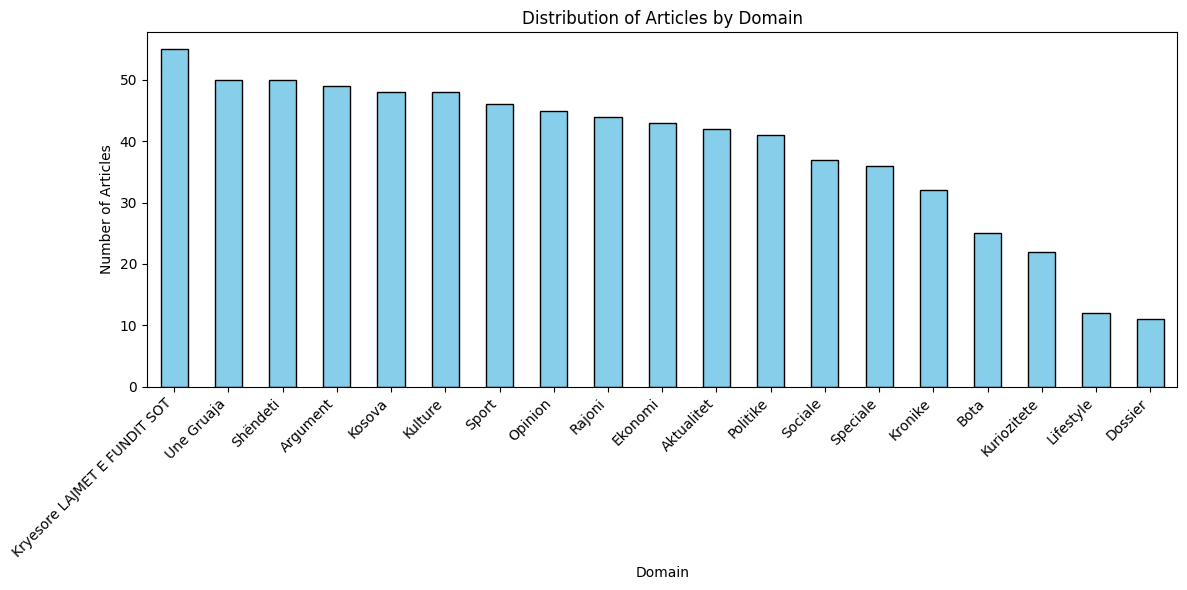

In [ ]:
# 1. Distribution of Articles by Domain
plt.figure(figsize=(12, 6))
domain_counts = df['Domain'].value_counts()
domain_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Articles by Domain')
plt.xlabel('Domain')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

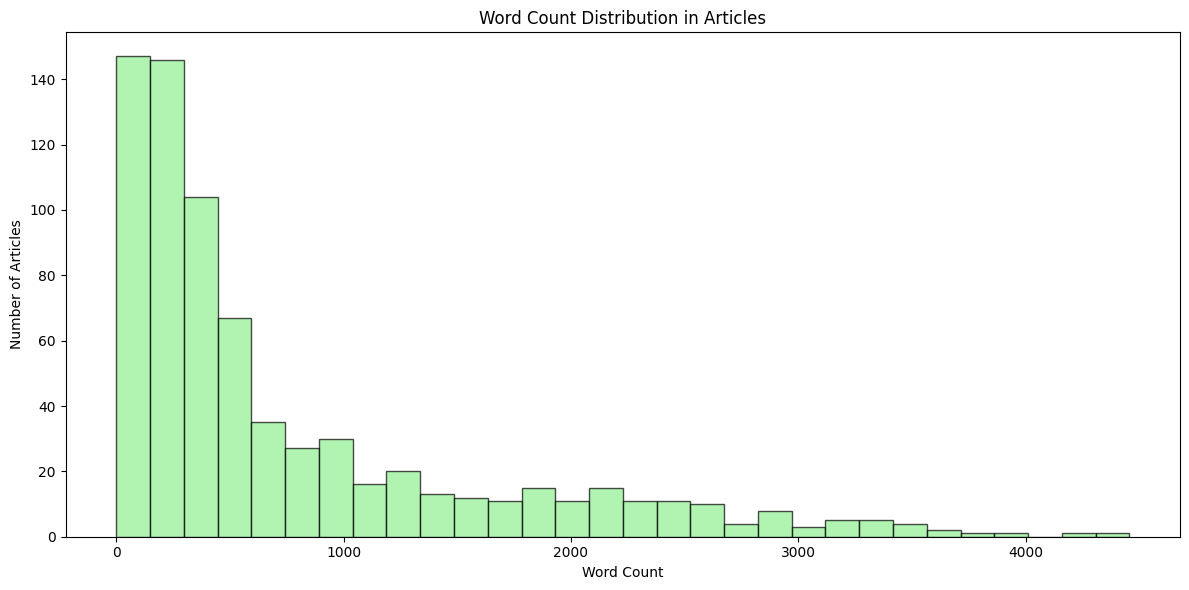

In [ ]:
# 2. Word Count Distribution in Articles
plt.figure(figsize=(12, 6))
plt.hist(df['Word Count'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Word Count Distribution in Articles')
plt.xlabel('Word Count')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.show()

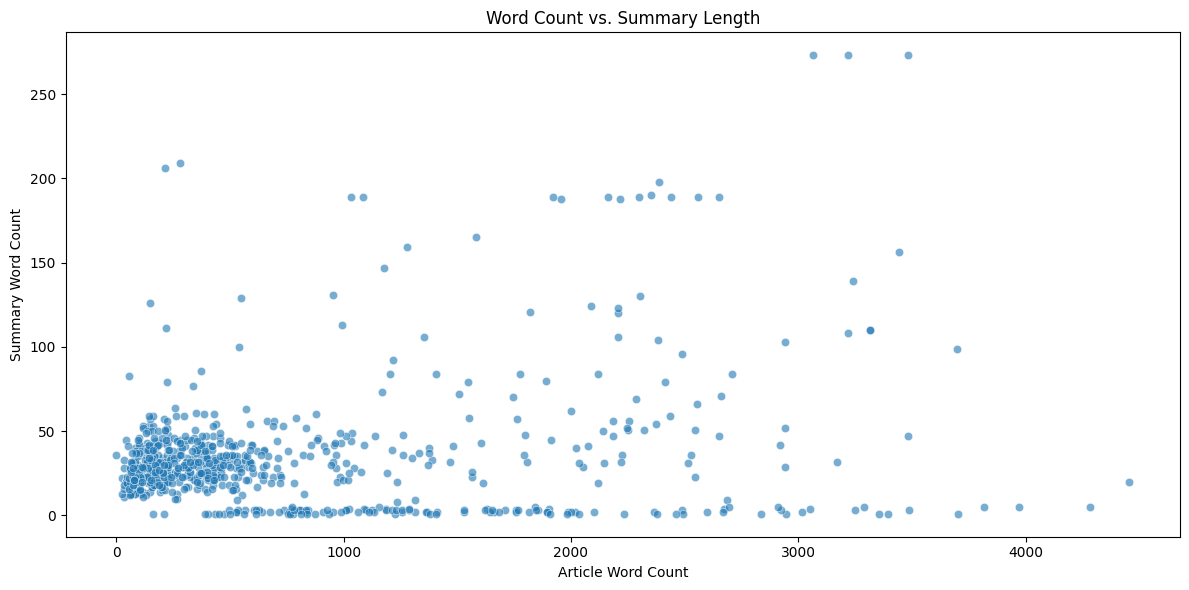

In [ ]:
# 4. Relationship Between Word Count and Summary Length
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Word Count', y='Summary Length', alpha=0.6)
plt.title('Word Count vs. Summary Length')
plt.xlabel('Article Word Count')
plt.ylabel('Summary Word Count')
plt.tight_layout()
plt.show()

Transform

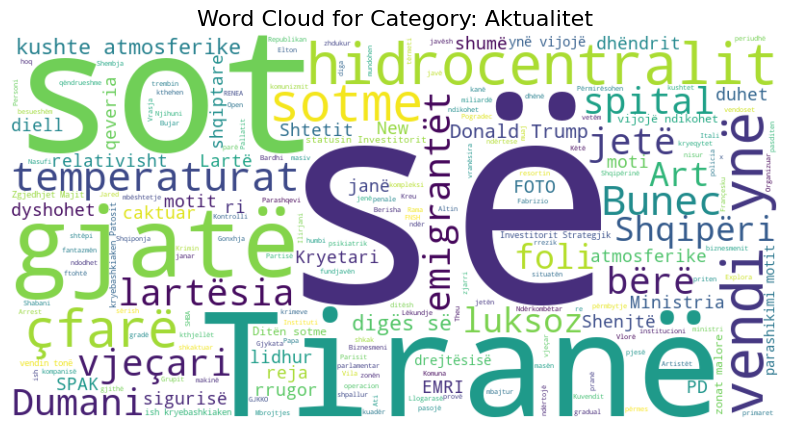

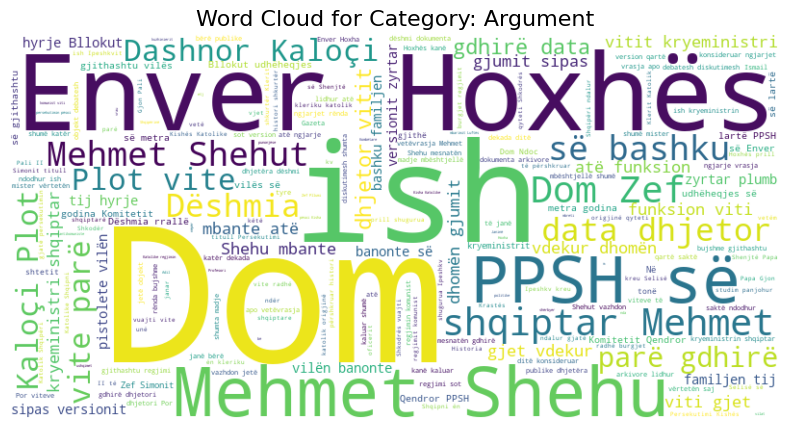

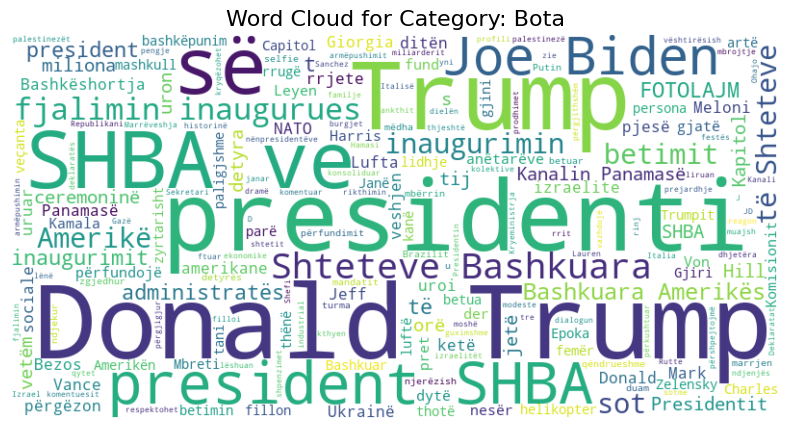

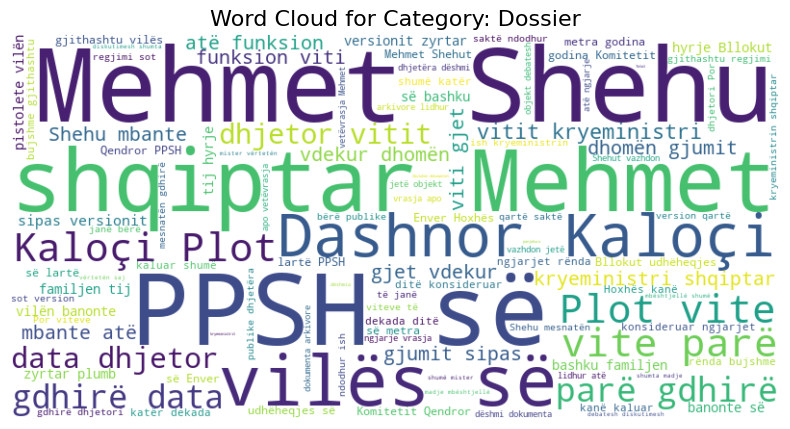

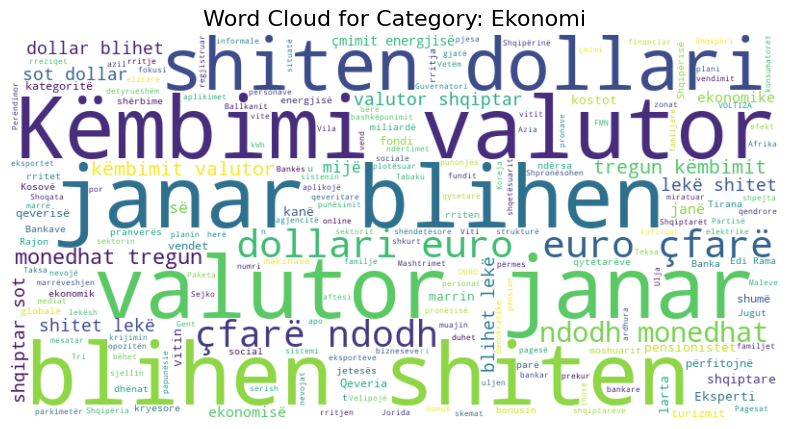

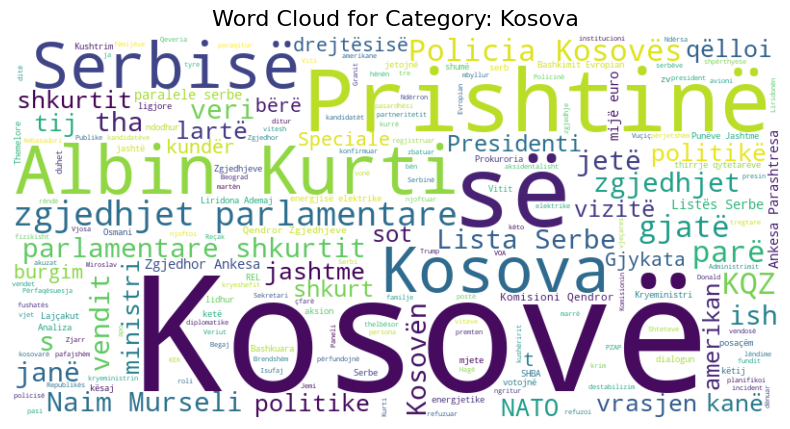

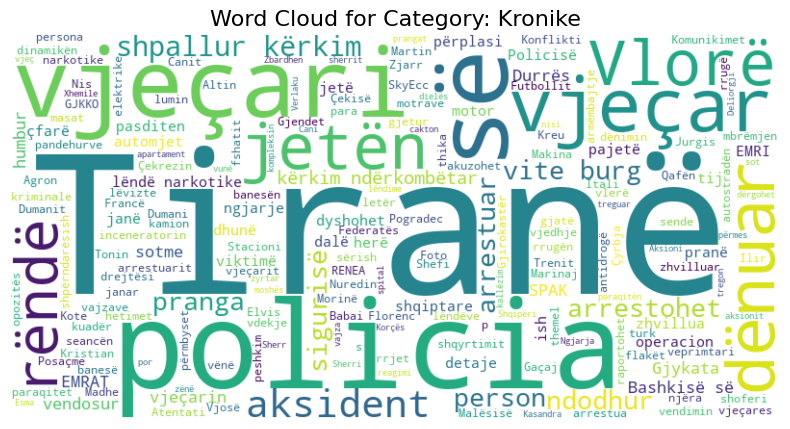

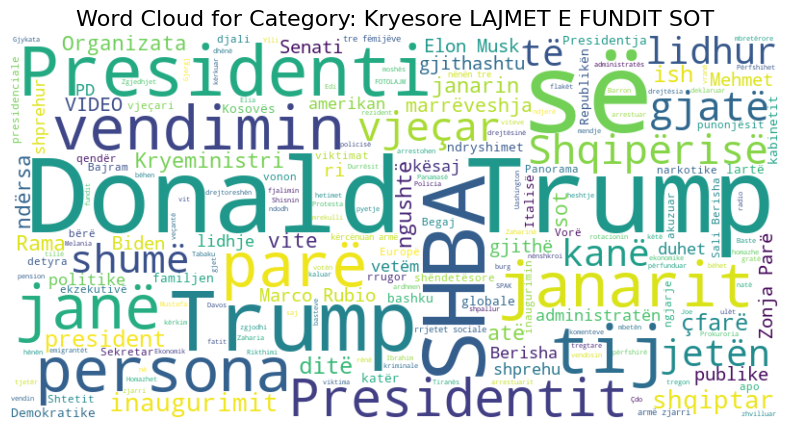

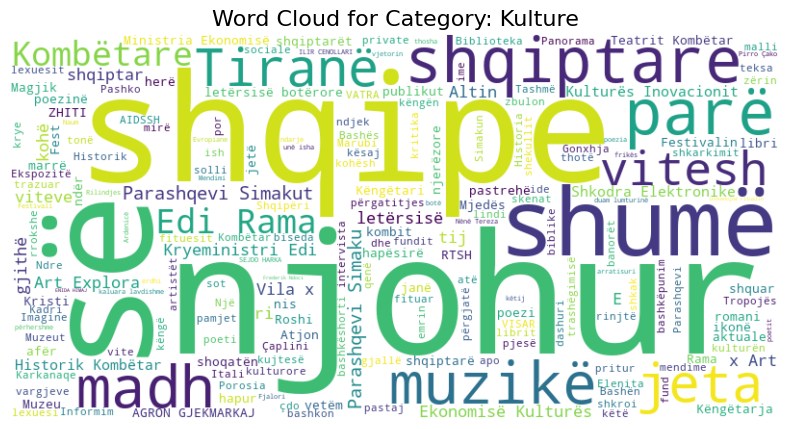

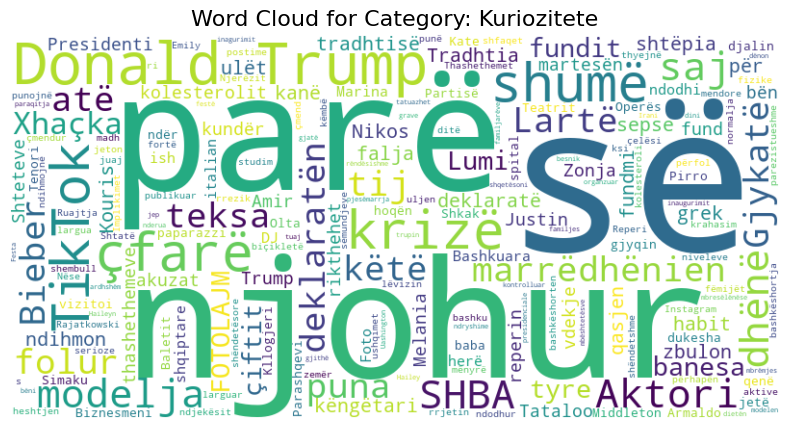

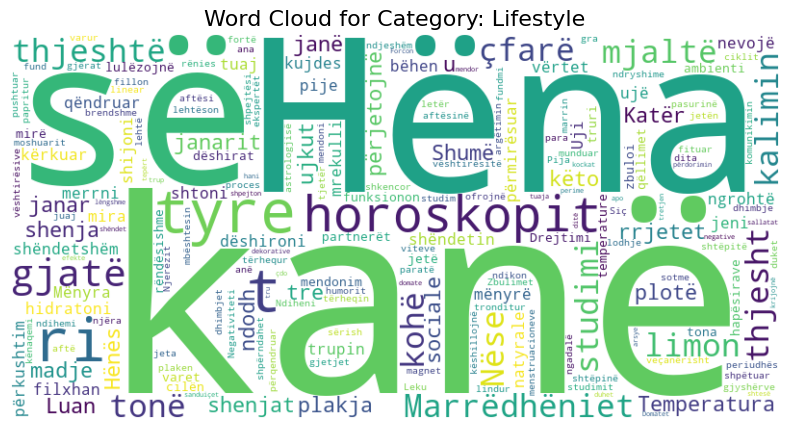

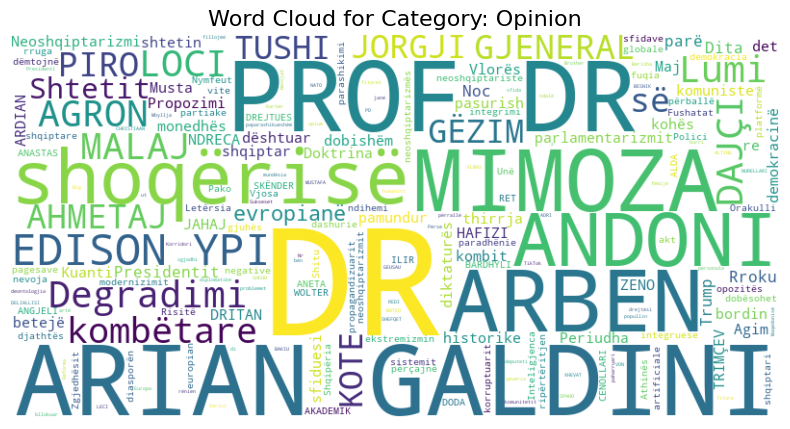

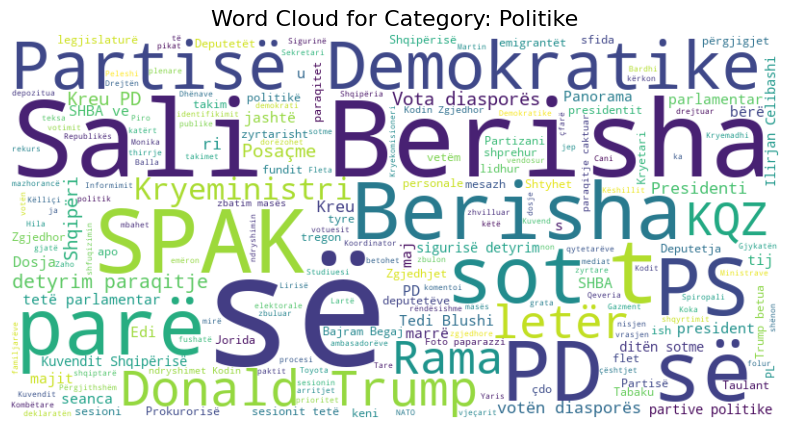

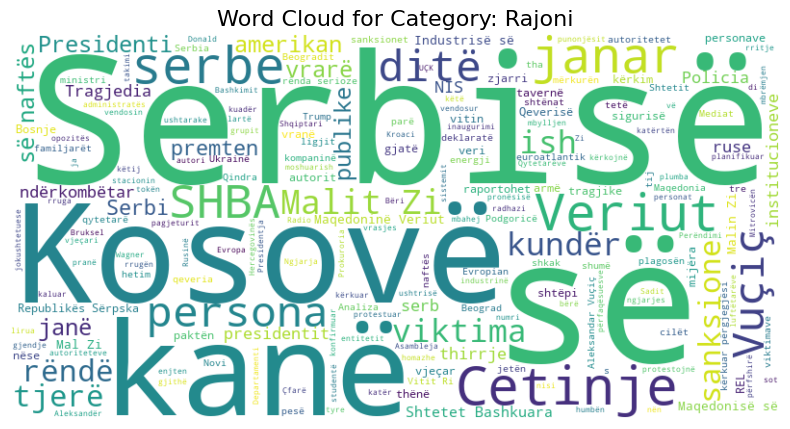

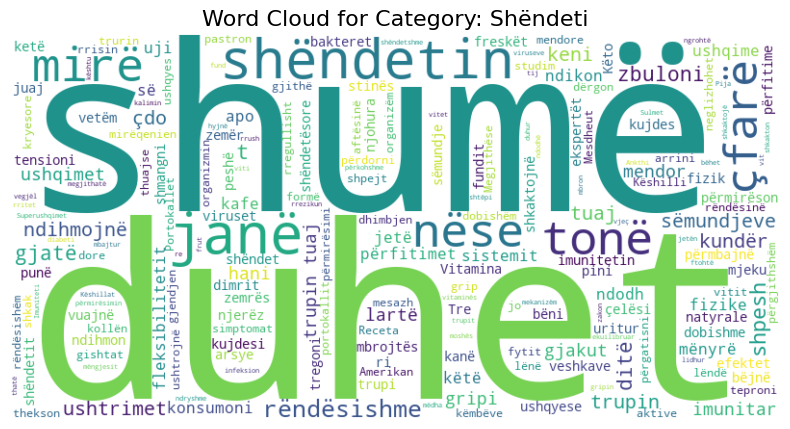

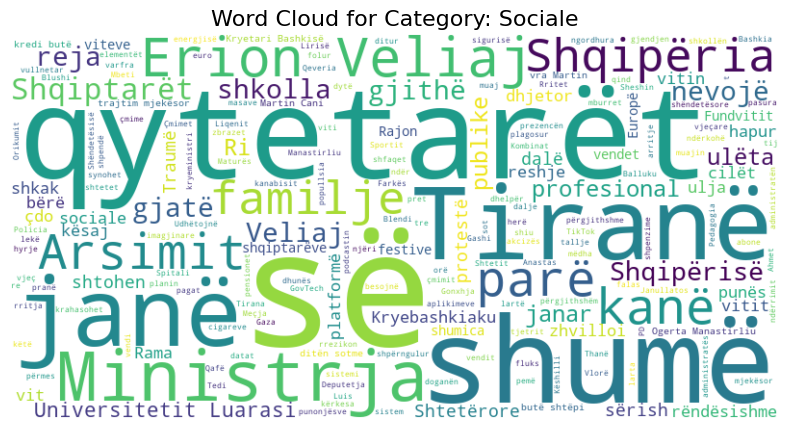

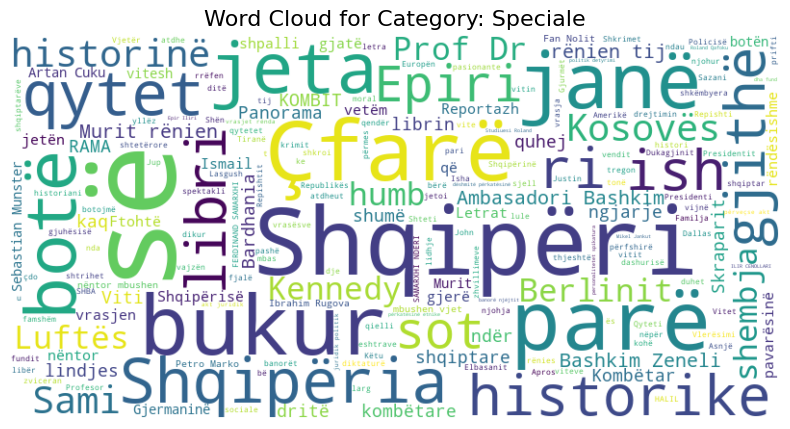

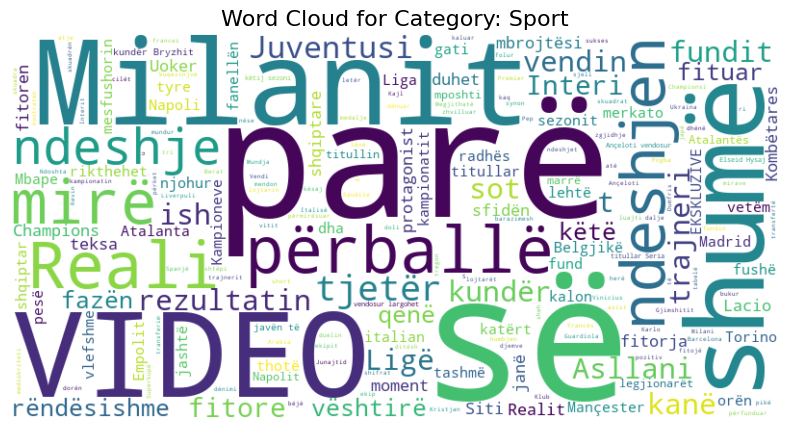

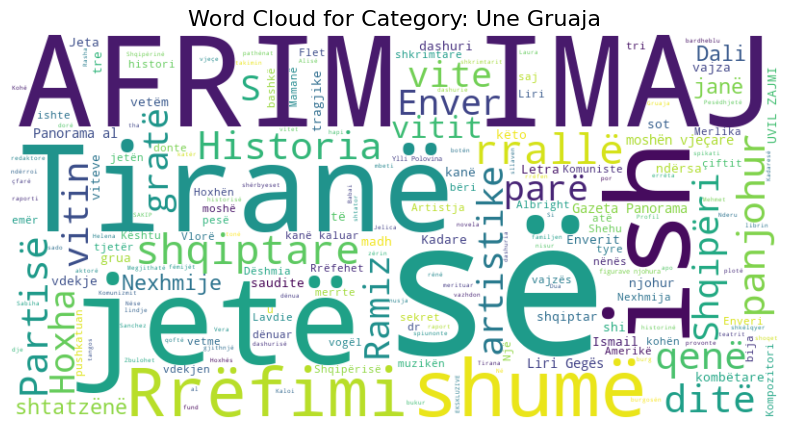

In [ ]:
albanian_stopwords = {
    "të", "e", "në", "i", "për", "me", "nga", "dhe", "një", "që", "është", "ka", "do", "u", "më", 'te', 'qe', 'ne', 'nje', 'a', 'per', 'sh', 'eshte',
    'shih', 'nuk', 'm', 'dicka', 'ose', 'si', 'shume', 'etj', 'se', 'pa', 'sipas', 's', 't', 'dikujt', 'dike', 'mire',
    'vet', 'bej', 'ai', 'vend', 'prej', 'ja', 'duke', 'tjeter', 'kur', 'ia', 'ku', 'ta', 'keq', 'dy', 'ben', 'bere',
    'behet', 'dickaje', 'edhe', 'madhe', 'la', 'sa', 'gjate', 'zakonisht', 'pas', 'veta', 'mbi', 'disa', 'iu', 'mos',
    'c', 'para', 'dikush', 'gje', 'be', 'pak', 'tek', 'fare', 'beri', 'po', 'bie', 'k', 'gjithe', 'vete', 'mund', 'kam',
    'le', 'jo', 'beje', 'tij', 'kane', 'ishte', 'jane', 'vjen', 'ate', 'kete', 'neper', 'cdo', 'na', 'marre', 'merr',
    'mori', 'rri', 'deri', 'b', 'kishte', 'mban', 'perpara', 'tyre', 'marr', 'gjitha', 'as', 'vetem', 'nen', 'here',
    'tjera', 'tjeret', 'drejt', 'qenet', 'ndonje', 'nese', 'jap', 'merret', 'rreth', 'lloj', 'dot', 'saj', 'nder',
    'ndersa', 'cila', 'veten', 'ma', 'ndaj', 'mes', 'ajo', 'cilen', 'por', 'ndermjet', 'prapa', 'mi', 'tere', 'jam',
    'ashtu', 'kesaj', 'tille', 'behem', 'cilat', 'kjo', 'menjehere', 'ca', 'je', 'aq', 'aty', 'prane', 'ato', 'pasur',
    'qene', 'cilin', 'teper', 'njera', 'tej', 'krejt', 'kush', 'bejne', 'ti', 'bene', 'midis', 'cili', 'ende', 'keto',
    'kemi', 'sic', 'kryer', 'cilit', 'atij', 'gjithnje', 'andej', 'siper', 'sikur', 'ketej', 'ciles', 'ky', 'papritur',
    'ua', 'kryesisht', 'gjithcka', 'pasi', 'kryhet', 'mjaft', 'ketij', 'perbashket', 'ata', 'atje', 'vazhdimisht',
    'kurre', 'tone', 'keshtu', 'une', 'sapo', 'rralle', 'vetes', 'ishin', 'afert', 'tjetren', 'ketu', 'cfare', 'to',
    'anes', 'jemi', 'asaj', 'secila', 'kundrejt', 'ketyre', 'pse', 'tilla', 'mua', 'nepermjet', 'cilet', 'ndryshe',
    'kishin', 'ju', 'tani', 'atyre', 'dic', 'yne', 'kudo', 'sone', 'sepse', 'cilave', 'kem', 'ty'
}

# Replace NaN with an empty string in the 'Text' column
df['Text'] = df['Text'].fillna("").astype(str)

# Generate bar charts for the most common words in each category
category_text = df.groupby('Domain')['Text'].apply(lambda x: " ".join(x)).reset_index()


# Generate and visualize word clouds for each category
for category, text in category_text.values:
    # Remove stop words
    filtered_text = " ".join([word for word in text.split() if word.lower() not in albanian_stopwords])

    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Category: {category}", fontsize=16)
    plt.axis('off')
    plt.show()


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Data Cleaning
df['Domain'] = df['Domain'].str.replace('\n', ' ', regex=False).str.strip()
df['Text'] = df['Title'].fillna('') + " " + df['Summary'].fillna('')

# Target variable and features
X = df['Text']
y = df['Domain']

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Use top 5000 features
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.5540540540540541

Classification Report:
                               precision    recall  f1-score   support

                  Aktualitet       1.00      0.22      0.36         9
                    Argument       0.50      0.40      0.44        10
                        Bota       0.38      0.60      0.46         5
                     Dossier       0.00      0.00      0.00         2
                     Ekonomi       0.64      0.78      0.70         9
                      Kosova       1.00      0.80      0.89        10
                     Kronike       0.46      1.00      0.63         6
Kryesore LAJMET E FUNDIT SOT       0.40      0.18      0.25        11
                     Kulture       0.67      0.40      0.50        10
                 Kuriozitete       0.40      0.50      0.44         4
                   Lifestyle       0.00      0.00      0.00         2
                     Opinion       0.75      1.00      0.86         9
                    Politike       

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
import uvicorn

# Step 2: FastAPI App Setup
app = FastAPI()

# Step 3: Define Input Schema
class NewsInput(BaseModel):
    title: str
    summary: str

# Step 4: Prediction Function
@app.post("/predict")
async def predict_news(news: NewsInput):
    """
    Receives news title and summary, and predicts the category.
    """
    # Combine title and summary, and transform using TF-IDF
    input_text = [news.title + " " + news.summary]
    transformed_text = tfidf.transform(input_text)

    # Predict the category
    predicted_category = model.predict(transformed_text)[0]
    return {"predicted_category": predicted_category}

@app.get("/")
def read_root():
    return {"message": "Welcome to the News Classification API"}